<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid') 
%matplotlib inline


plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer: Started with .info. Noticed that it can also answer this question
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
# Answer: 120 min( 2hours)
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [122]:
#to find  the mean to have a middle point of max and min
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [132]:
# Answer: Hamlet is the longest movie, freaks is the shortest
movies.groupby('duration').title.max()



duration
64                                                Freaks
66                                   Battleship Potemkin
67                           The Cabinet of Dr. Caligari
68                                               The Kid
69                                             Following
70                                          Frankenstein
75                             The Bride of Frankenstein
76                        The Nightmare Before Christmas
78                                                 [Rec]
79                                                 Zelig
80                                       The Dinner Game
81                                             Toy Story
82                                    This Is Spinal Tap
83                          The Texas Chain Saw Massacre
84                                                    Pi
85        The Naked Gun: From the Files of Police Squad!
86                                        The Iron Giant
87                    

#### Create a histogram of duration, choosing an "appropriate" number of bins.

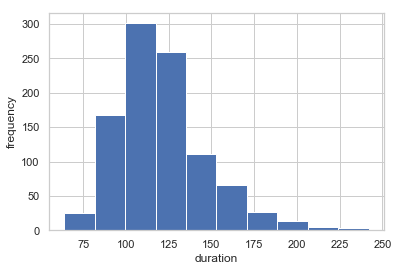

In [20]:
# Answer: Started with 20 bins because of the 979 objects in the column duration. Cut it to 10. it seemed ok so tried 6 and 3 and
#it lumped the data too closely to see any specifics so i went back to 10
movies.duration.plot(kind='hist', bins=10);
plt.xlabel('duration');
plt.ylabel('frequency');

#### Use a box plot to display that same data.

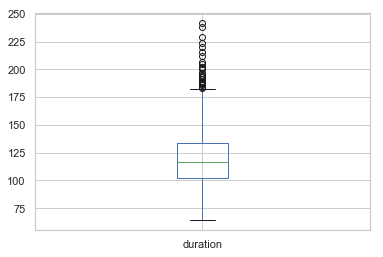

In [18]:
# Answer: Originally had tried to movies.duration.boxplot and it didnt work. So i returned to the data viz lab
#and saw that .plot(kind = can access several plots like bar, hist, etc.)
movies.duration.plot(kind='box')
sns.set(style='whitegrid')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [21]:
#979 total items in this colulmn
movies.content_rating.shape


(979,)

In [22]:
#only 3 NaN. So 979-3= 976 
movies[movies['content_rating'].isnull()]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [23]:
#verified wth notnull being 976
movies[movies['content_rating'].notnull()]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [24]:
# Answer:
movies.groupby(['content_rating']).count()

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


In [26]:
#after 2hours
#was reviewing and figured this must be the correct answer
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

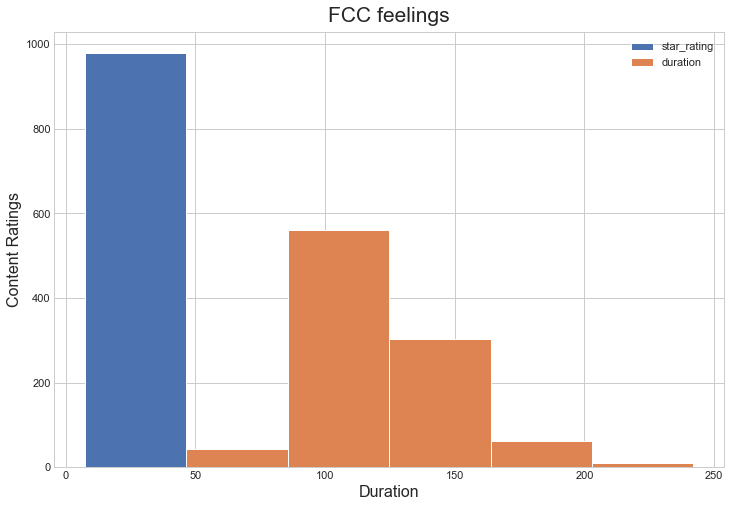

In [133]:
#major issues with this question. Its plotting numerical data but the column is an object so not sure if i need to change the 
#column into a integer???? Can't understand why it plotted a bar garaph

cr = movies.plot(kind='hist', bins=6, figsize=(12,8));

# Set the title.
cr.set_title('FCC feelings', fontsize=21, y=1.01);

# Move the legend.
cr.legend(loc=1);

# x-axis labels
cr.set_ylabel('Content Ratings', fontsize=16);

# y-axis labels
cr.set_xlabel('Duration', fontsize=16);

Text(0.5,1,'FCC Feelings')

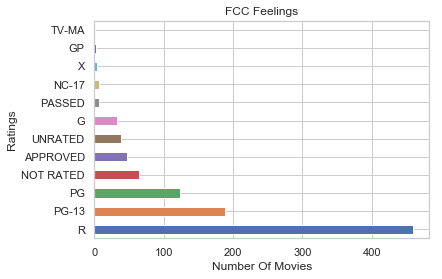

In [33]:
#during review of eda and using the value counts function, i was able to plot this
movies.content_rating.value_counts().plot(kind='barh');
plt.xlabel('Number Of Movies');
plt.ylabel('Ratings');
plt.title('FCC Feelings')


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [128]:
# Answer: confused in terms of what is being asked
movies['content_rating'] = content_rating
for x in content_rating:
    if('NOT RATED', 'APPROVED','PASSED','GP'):
        print('UNRATED')
        

NameError: name 'content_rating' is not defined

In [130]:
movies.content_rating = [x.replace('NOT RATED', 'APPROVED','PASSED','GP'),  ('UNRATED') for x in movies.content_rating]


SyntaxError: invalid syntax (<ipython-input-130-892dbf370bf0>, line 1)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [ ]:
# Answer:don't understand

#### Count the number of missing values in each column.

In [69]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

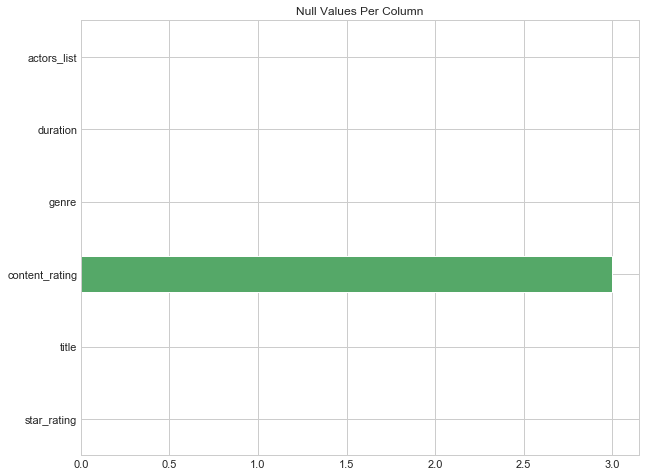

In [74]:
movies.isnull().sum().plot(kind='barh');         #shows visually how content_rating has all the nulls
plt.title('Null Values Per Column');

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [85]:
# Answer:found unique values

movies['content_rating'].unique()


array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [87]:
#added missing values to unrated
movies.content_rating.fillna(value='UNRATED', inplace=True)


In [88]:
#confirms missing values removed
movies.content_rating.isnull().sum()


0

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [116]:
# Answer:
movies[movies.duration > 120].mean()


star_rating      7.953670
duration       143.385321
dtype: float64

In [117]:
movies[movies.duration < 120].mean()


star_rating      7.838667
duration       102.405714
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

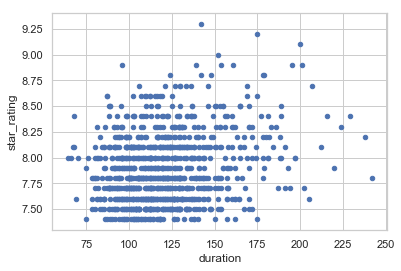

In [36]:
# Answer:Scater plots are great for detecting a relationship between 2 numerical variables
movies.plot(kind='scatter', x='duration', y='star_rating');

#### Calculate the average duration for each genre.

In [37]:
# Answer: Had to make a groupby 
movies.groupby('genre') ['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [136]:
dur_ratings = movies.groupby('content_rating').duration.agg(['sum', 'mean', 'max', 'min'])

In [137]:
dur_ratings

,sum,mean,max,min
content_rating,,,,
APPROVED,5354,113.914894,220,78
G,3595,112.343750,238,75
GP,407,135.666667,172,91
NC-17,839,119.857143,179,85
NOT RATED,7973,122.661538,189,68
PASSED,730,104.285714,172,68
PG,14182,115.300813,224,76
PG-13,24040,127.195767,242,78
R,56195,122.163043,229,69


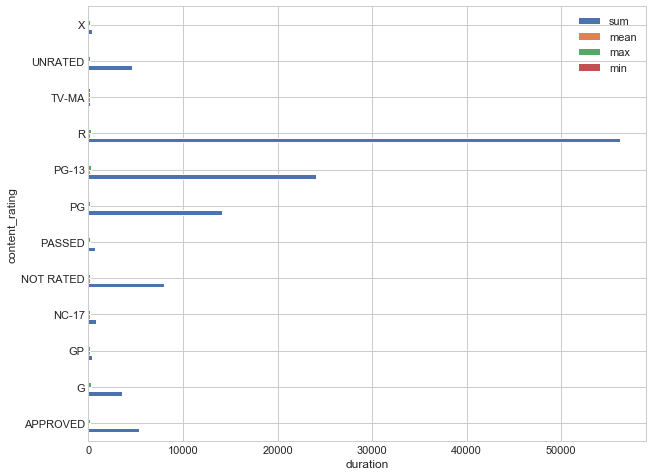

In [143]:
dur_ratings.plot(kind='barh');
plt.xlabel('duration');
plt.ylabel('content_rating');


#### Determine the top rated movie (by star rating) for each genre.

In [98]:
# Answer:
movies.groupby('genre') ['star_rating'].describe(include='all')



,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,136.0,7.884559,0.333084,7.4,7.600,7.80,8.100,9.0
Adventure,75.0,7.933333,0.361802,7.4,7.650,7.90,8.100,8.9
Animation,62.0,7.914516,0.292444,7.4,7.700,7.90,8.100,8.6
Biography,77.0,7.862338,0.310364,7.4,7.600,7.80,8.100,8.9
Comedy,156.0,7.822436,0.304922,7.4,7.600,7.80,8.000,8.6
Crime,124.0,7.916935,0.392143,7.4,7.600,7.80,8.100,9.3
Drama,278.0,7.902518,0.328041,7.4,7.600,7.90,8.100,8.9
Family,2.0,7.850000,0.070711,7.8,7.825,7.85,7.875,7.9
Fantasy,1.0,7.700000,NaN,7.7,7.700,7.70,7.700,7.7


In [93]:
#didnt work because movies are objects not integers
movies.loc[:, ['genre', 'star_rating', 'title']].describe(include='all')

,genre,star_rating,title
count,979,979.000000,979
unique,16,NaN,975
top,Drama,NaN,Les Miserables
freq,278,NaN,2
mean,NaN,7.889785,NaN
std,NaN,0.336069,NaN
min,NaN,7.400000,NaN
25%,NaN,7.600000,NaN
50%,NaN,7.800000,NaN
75%,NaN,8.100000,NaN


In [144]:
best = movies.groupby('genre').star_rating.agg(['max', 'min'])



In [145]:
best

,max,min
genre,,
Action,9.0,7.4
Adventure,8.9,7.4
Animation,8.6,7.4
Biography,8.9,7.4
Comedy,8.6,7.4
Crime,9.3,7.4
Drama,8.9,7.4
Family,7.9,7.8
Fantasy,7.7,7.7


In [146]:
best2 =movies.groupby('star_rating').title.agg(['min', 'max'])

In [149]:
best3 = best + best2

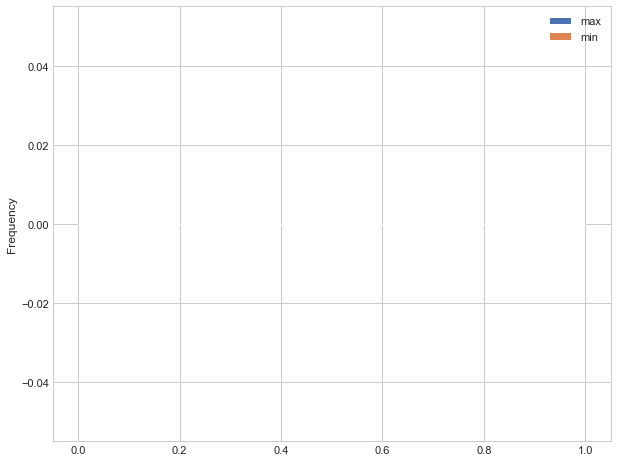

In [153]:
#lost
best3.plot(kind='hist', bins=4);


In [ ]:
#trying something else

In [112]:
best['star_rating', 'title'].describe(include='all')


star_rating                                                        \
                count unique top freq      mean       std  min    25%   50%   
genre                                                                         
Action          136.0    NaN NaN  NaN  7.884559  0.333084  7.4  7.600  7.80   
Adventure        75.0    NaN NaN  NaN  7.933333  0.361802  7.4  7.650  7.90   
Animation        62.0    NaN NaN  NaN  7.914516  0.292444  7.4  7.700  7.90   
Biography        77.0    NaN NaN  NaN  7.862338  0.310364  7.4  7.600  7.80   
Comedy          156.0    NaN NaN  NaN  7.822436  0.304922  7.4  7.600  7.80   
Crime           124.0    NaN NaN  NaN  7.916935  0.392143  7.4  7.600  7.80   
Drama           278.0    NaN NaN  NaN  7.902518  0.328041  7.4  7.600  7.90   
Family            2.0    NaN NaN  NaN  7.850000  0.070711  7.8  7.825  7.85   
Fantasy           1.0    NaN NaN  NaN  7.700000       NaN  7.7  7.700  7.70   
Film-Noir         3.0    NaN NaN  NaN  8.033333  0.305505  7.7  7.900  8.10   
History           1.0    NaN NaN  NaN  8.000000       NaN  8.0  8.000  8.00   
Horror           29.0    NaN NaN  NaN  7.806897  0.337989  7.4  7.500  7.70   
Mystery          16.0    NaN NaN  NaN  7.975000  0.387298  7.4  7.575  8.10   
Sci-Fi            5.0    NaN NaN  NaN  7.920000  0.192354  7.7  7.800  7.90   
Thriller          5.0    NaN NaN  NaN  7.680000  0.216795  7.5  7.500  7.60   
Western           9.0    NaN NaN  NaN  8.255556  0.387657  7.6  8.100  8.30   

                 ...   title                                                 \
             75% ...  unique                                  top freq mean   
genre            ...                                                          
Action     8.100 ...     136                          Hard Boiled    1  NaN   
Adventure  8.100 ...      74                            True Grit    2  NaN   
Animation  8.100 ...      62                      Despicable Me 2    1  NaN   
Biography  8.100 ...      77                     Saving Mr. Banks    1  NaN   
Comedy     8.000 ...     156                         The Graduate    1  NaN   
Crime      8.100 ...     123      The Girl with the Dragon Tattoo    2  NaN   
Drama      8.100 ...     278               A Very Long Engagement    1  NaN   
Family     7.875 ...       2  Willy Wonka & the Chocolate Factory    1  NaN   
Fantasy    7.700 ...       1            The City of Lost Children    1  NaN   
Film-Noir  8.200 ...       3                                Laura    1  NaN   
History    8.000 ...       1                  Battleship Potemkin    1  NaN   
Horror     8.000 ...      28                              Dracula    2  NaN   
Mystery    8.225 ...      16                              Vertigo    1  NaN   
Sci-Fi     8.000 ...       5                              Gravity    1  NaN   
Thriller   7.800 ...       5            The Man Who Knew Too Much    1  NaN   
Western    8.500 ...       9       The Good, the Bad and the Ugly    1  NaN   

                                         
           std  min  25%  50%  75%  max  
genre                                    
Action     NaN  NaN  NaN  NaN  NaN  NaN  
Adventure  NaN  NaN  NaN  NaN  NaN  NaN  
Animation  NaN  NaN  NaN  NaN  NaN  NaN  
Biography  NaN  NaN  NaN  NaN  NaN  NaN  
Comedy     NaN  NaN  NaN  NaN  NaN  NaN  
Crime      NaN  NaN  NaN  NaN  NaN  NaN  
Drama      NaN  NaN  NaN  NaN  NaN  NaN  
Family     NaN  NaN  NaN  NaN  NaN  NaN  
Fantasy    NaN  NaN  NaN  NaN  NaN  NaN  
Film-Noir  NaN  NaN  NaN  NaN  NaN  NaN  
History    NaN  NaN  NaN  NaN  NaN  NaN  
Horror     NaN  NaN  NaN  NaN  NaN  NaN  
Mystery    NaN  NaN  NaN  NaN  NaN  NaN  
Sci-Fi     NaN  NaN  NaN  NaN  NaN  NaN  
Thriller   NaN  NaN  NaN  NaN  NaN  NaN  
Western    NaN  NaN  NaN  NaN  NaN  NaN  

[16 rows x 22 columns]

In [54]:
movies.star_rating.describe()



count    979.000000
mean       7.889785
std        0.336069
min        7.400000
25%        7.600000
50%        7.800000
75%        8.100000
max        9.300000
Name: star_rating, dtype: float64

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


#trying something else

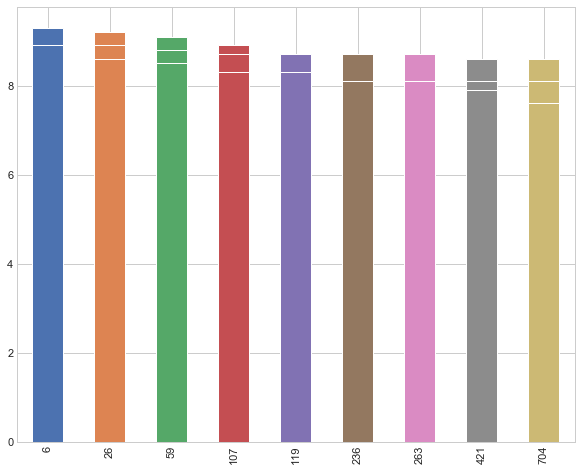

In [154]:
movies.groupby('genre') ['star_rating'].plot(kind='bar');


In [48]:
movies.groupby('star_rating') ['title'].describe()

,count,unique,top,freq
star_rating,,,,
7.4,49,49,Bound,1
7.5,108,108,Transamerica,1
7.6,124,124,Army of Darkness,1
7.7,113,113,Harry Potter and the Deathly Hallows: Part 1,1
7.8,116,116,Lost in Translation,1
7.9,75,75,Cabaret,1
8.0,97,97,The Graduate,1
8.1,103,103,Stalag 17,1
8.2,51,51,The Avengers,1


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [156]:
# Answer:
movies.genre.describe(include='all')

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [161]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [162]:
movies[movies.genre < 10]

TypeError: '<' not supported between instances of 'str' and 'int'

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!